In [1]:
import cv2
from matplotlib import pyplot as plt
# 開啟圖像
image = cv2.imread("4.jpg")

In [2]:
##透過新的window開啟
##cv2.imshow('ocr',image)
##cv2.waitKey(0)

In [3]:
##透過jupyter notebook開啟圖片
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height,width,depth = im_data.shape

    figsize = width/float(dpi),height/float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])

    ax.axis('off')
    ax.imshow(im_data,cmap='gray')

    plt.show()

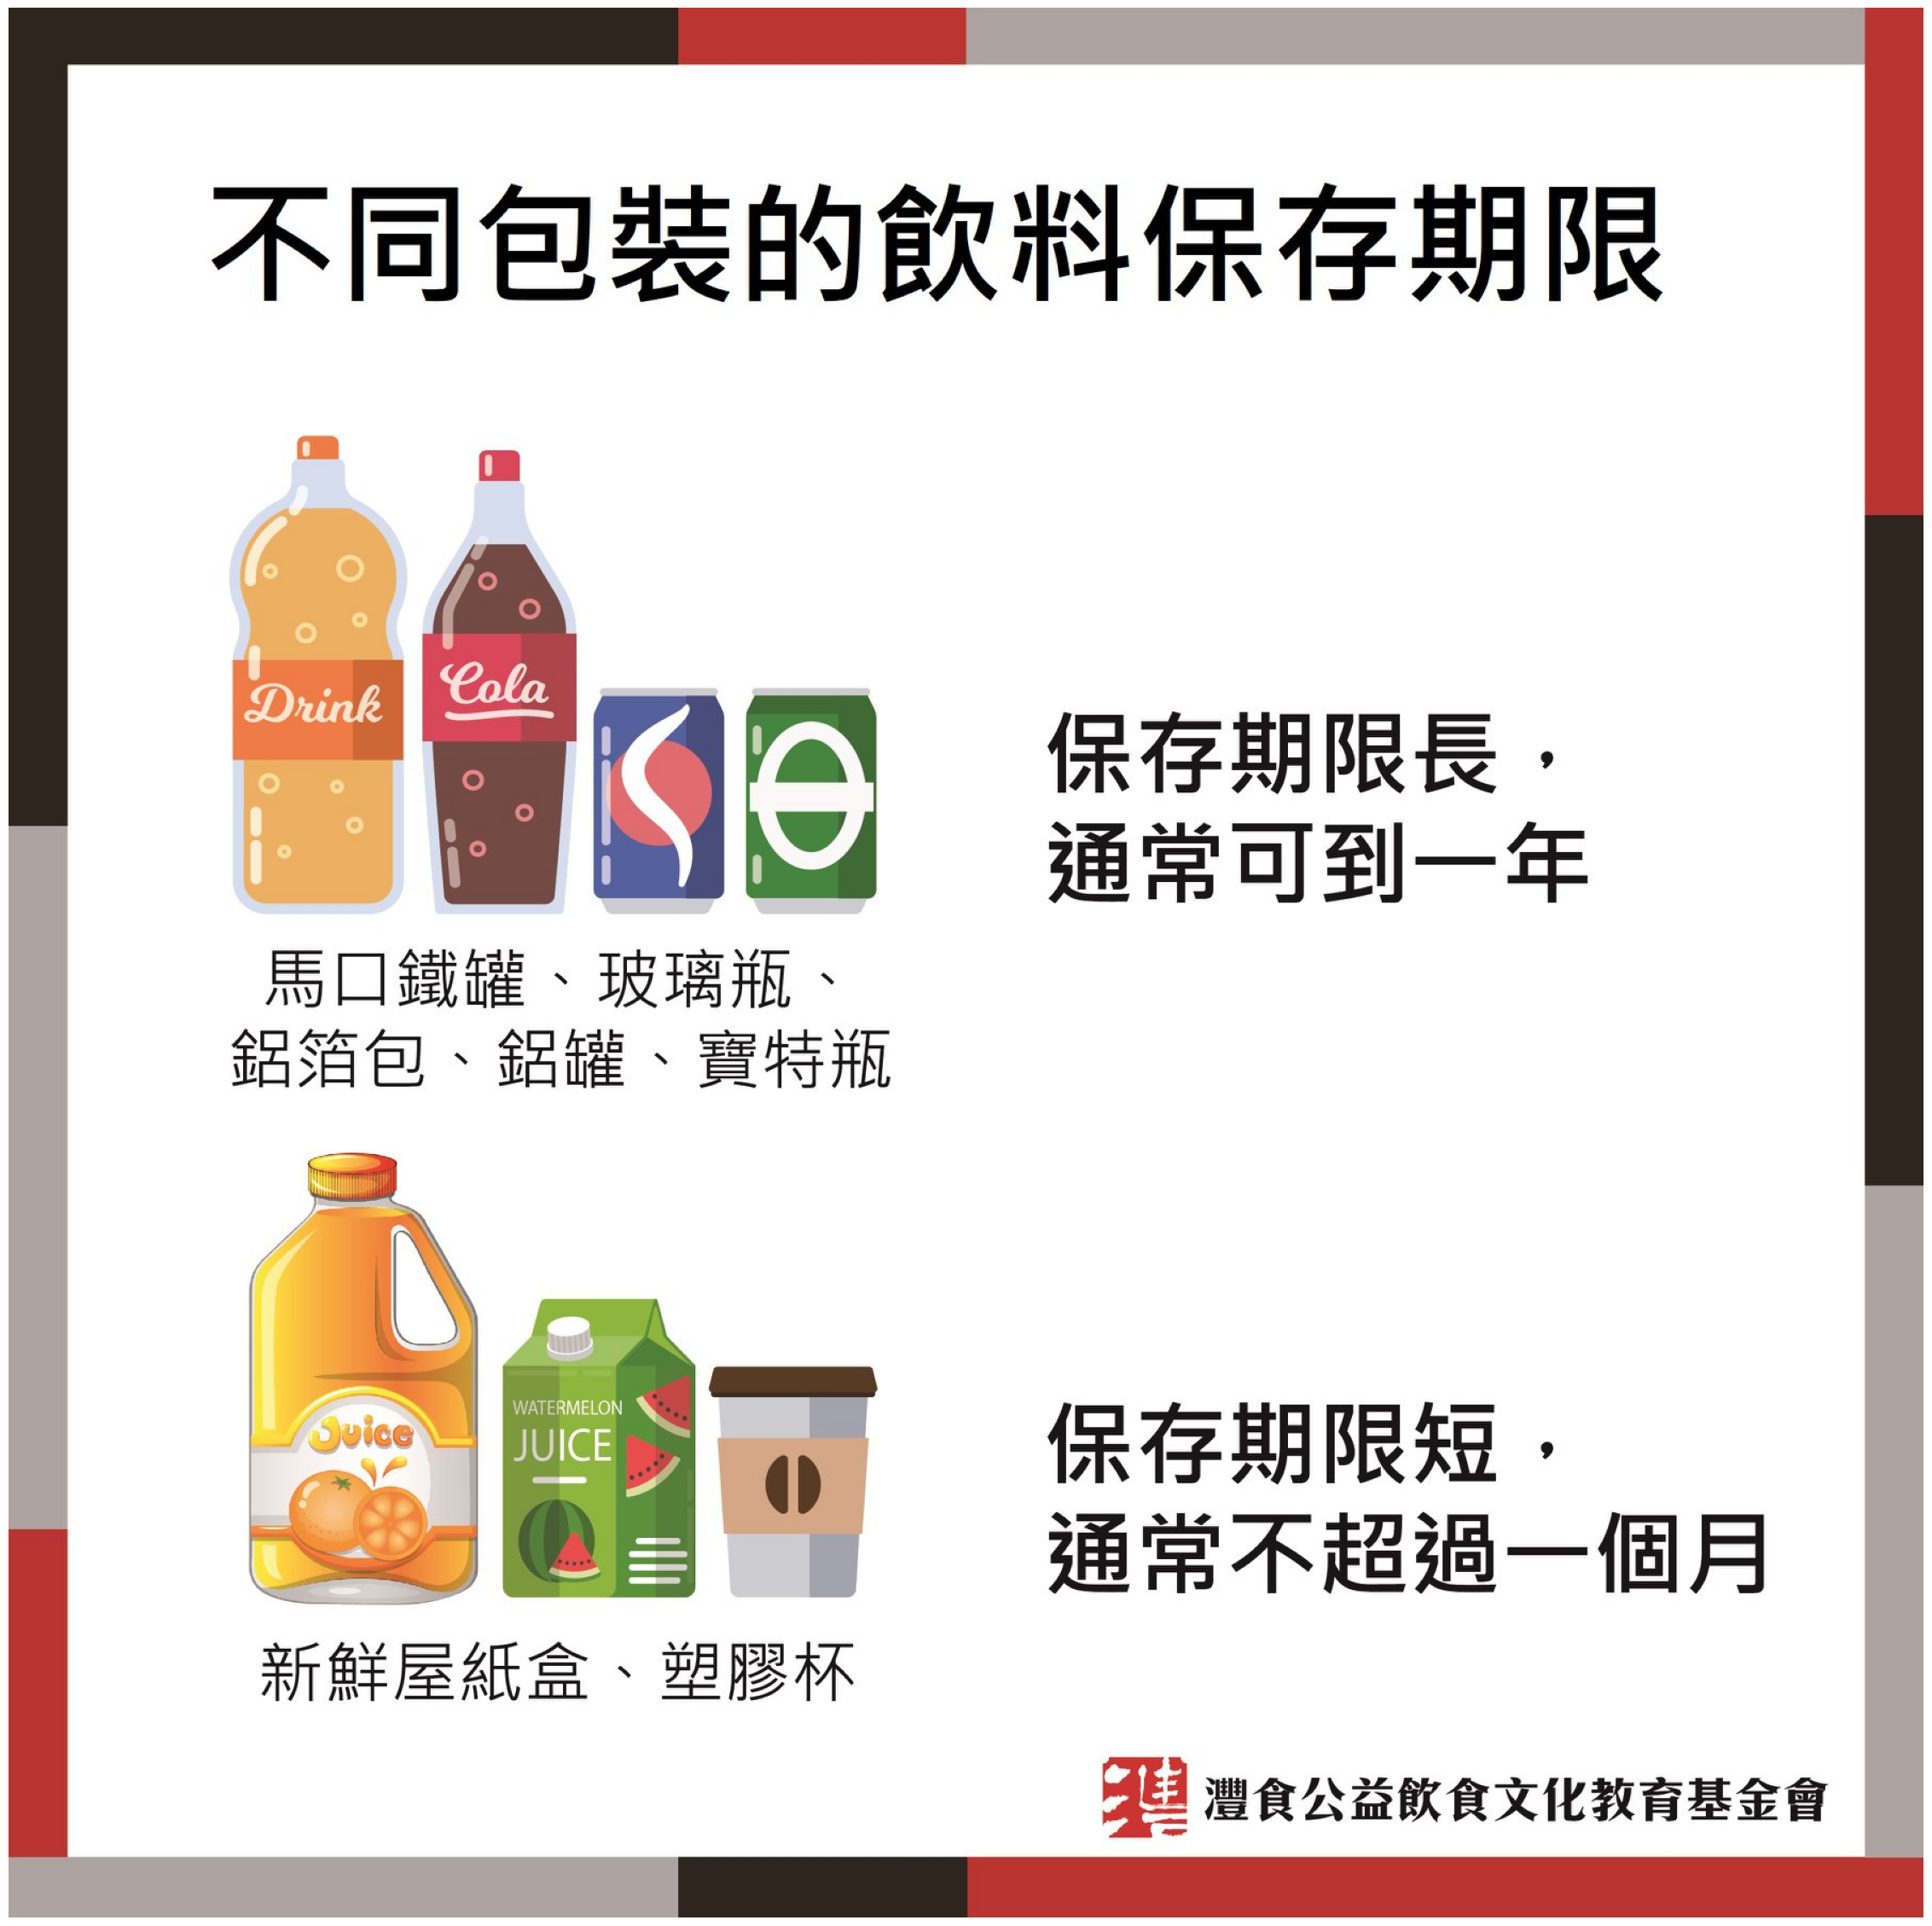

In [4]:
display('4.jpg')

In [5]:
##invert image透過顏色的顛倒進行圖像預處理
inverted_image = cv2.bitwise_not(image)
cv2.imwrite("4_invert.jpg",inverted_image)

True

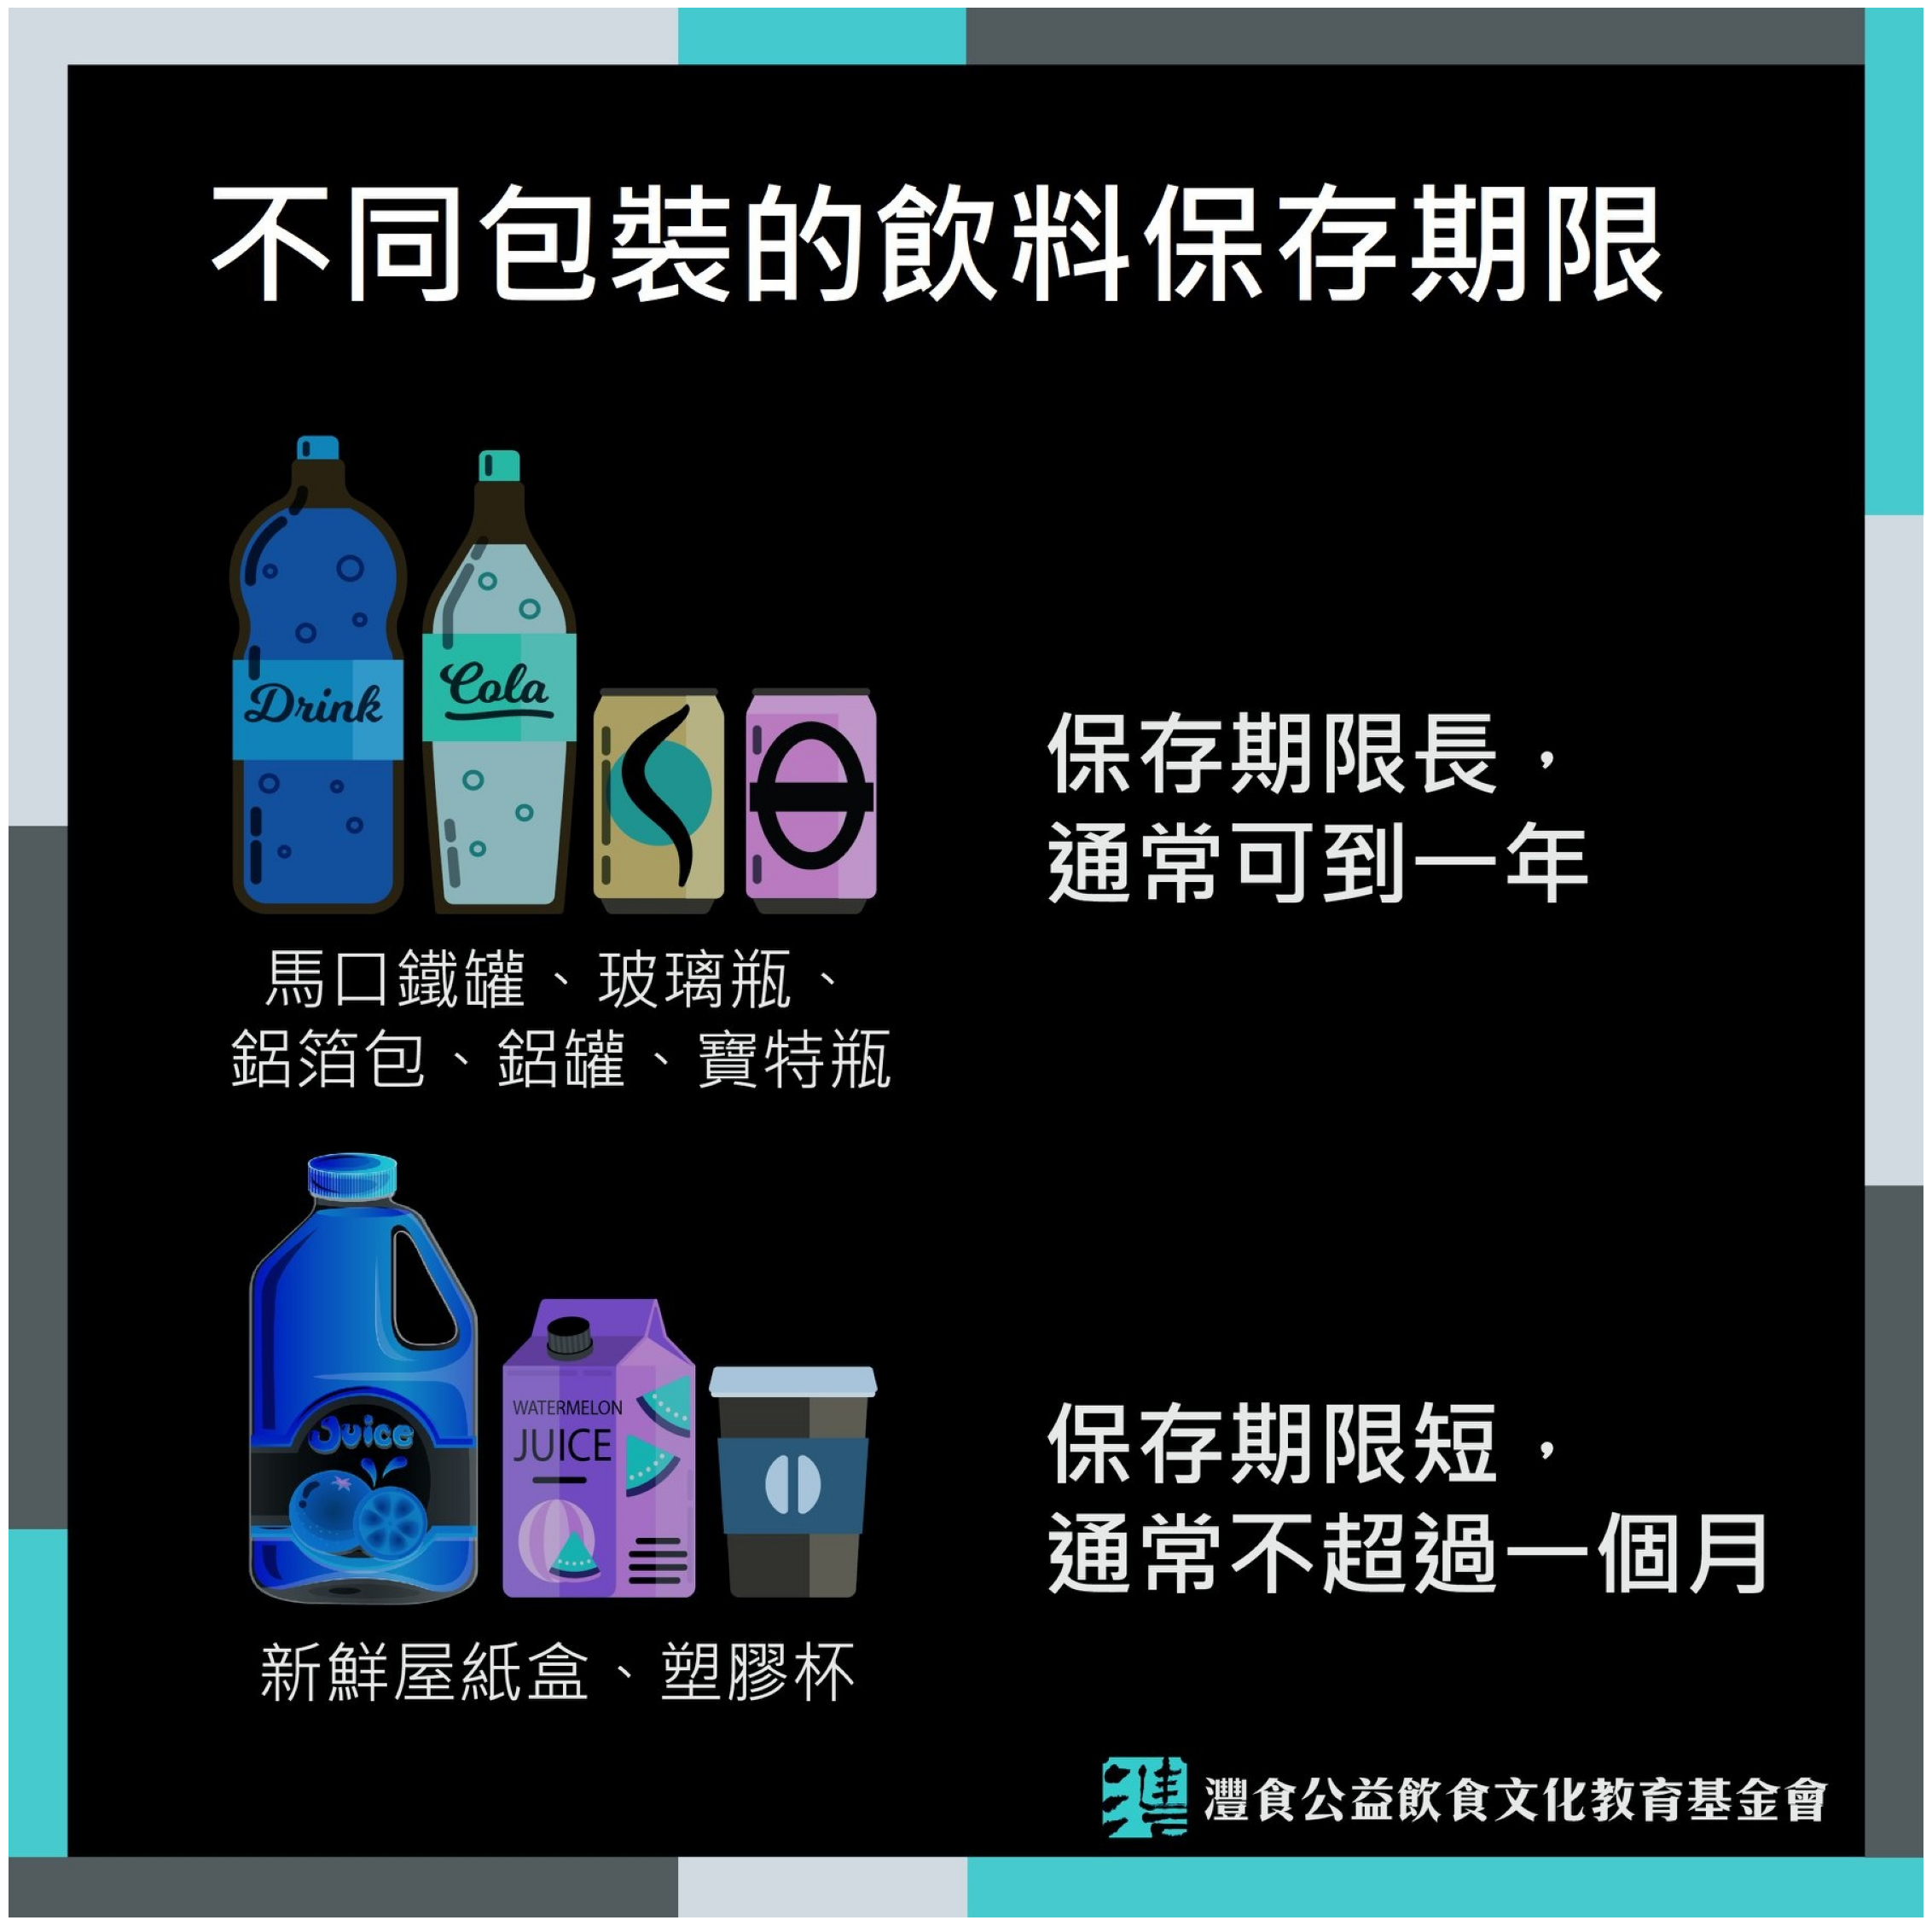

In [6]:
display("4_invert.jpg")

In [7]:
##二質化透過此方法將透過顏色轉為黑白
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imwrite("4_gray.jpg",gray_image)
##cv2.imshow("4_gray_image",gray_image)
##cv2.waitKey(0)

True

In [8]:
##將黑白對比提高
thresh,im_bw = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
cv2.imwrite("4_bw_image.jpg",im_bw)
##cv2.imshow("4_im_bw",im_bw)
##cv2.waitKey(0)

True

In [9]:
##移除圖片上的噪點
def noise_removal(image):
    import numpy as np
    kernal = np.ones((1 ,1),np.uint8)
    image = cv2.dilate(image,kernal,iterations=1)
    kernal = np.ones((1,1),np.uint8)
    image = cv2.erode(image,kernal,iterations=1)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernal)
    image = cv2.medianBlur(image,3)
    return(image)

In [10]:
no_noise = noise_removal(im_bw) 
cv2.imwrite("4_no_noise.jpg",no_noise)

True

In [11]:
##cv2.imshow("4_im_bw",im_bw)
##cv2.imshow("4_no_noise",no_noise)
##cv2.waitKey(0)

In [12]:
##透過Dilation and Erosion去修正移除噪點所導致字體過粗或過細之問題
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.int8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return(image)

def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.int8)
    image = cv2.dilate(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return(image)

In [13]:
dilate_image = thick_font(no_noise)
eroded_image = thin_font(no_noise)
cv2.imwrite("4_eroded_image.jpg",eroded_image)
cv2.imwrite("4_dilate_image.jpg",dilate_image)
##cv2.imshow("4_dilate_image",dilate_image)
##cv2.imshow("4_eroded_image",eroded_image)
##cv2.waitKey(0)

True

In [14]:
##以肉眼來看，目前im_bw的字看得最清晰

In [15]:
##由於預處理後的保存期限四字為白字，在不影響判斷的情況下轉為黑字
new_inverted_image = cv2.bitwise_not(dilate_image)
cv2.imwrite("4_new_invert.jpg",new_inverted_image)
##cv2.imshow("4_new_invert.jpg",new_inverted_image)
##cv2.waitKey(0)

True

In [16]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# 使用OCR進行文字識別
imge1=cv2.imread("4.jpg")
imge2=cv2.imread("4_invert.jpg")
imge3=cv2.imread("4_gray.jpg")
imge4=cv2.imread("4_no_noise.jpg")
imge5=cv2.imread("4_eroded_image.jpg")
imge6=cv2.imread("4_dilate_image.jpg")
imge7=cv2.imread("4_bw_image.jpg")
text = pytesseract.image_to_string(imge1, lang='chi_tra')
print(text)

不 同 包裝 的 飲料 保存 期 限

保存 期 限 長 ,
通常 可 到 一 年
馬口鐵 砍 、 玻 璃 瓶 、
保存 期 限 短 ,
2 二 三 通 帝 不 超 過 一 個 月
新 鮮 屋 紙 盒 、 塑 膠 林
若 3 沸 食 公益 飲食 文 化 教育 基金 會




In [17]:
text = pytesseract.image_to_string(imge2, lang='chi_tra')
print(text)

不 同 包裝 的 飲料 保存 期 限

保存 期 限 長 ,

通常 可 到 一 年
馬口鐵 砍 、 玻 璃 瓶 、

保存 期 限 短 ,
通常 不 超 過 一 個 月
新 鮮 屋 紙 含 、 塑 膠 林

若 3 沸 食 公益 飲食 文 化 教育 基金 會




In [18]:
text = pytesseract.image_to_string(imge3, lang='chi_tra')
print(text)

不 同 包裝 的 飲料 保存 期 限

區 圖
引 慚 6 S 保存 期 限 長 ,
通常 可 到 一 年
馬口鐵 罐 、 玻 璃 瓶 、
鋁 消 包 、 鋁 吹 、 寶 特 瓶

保存 期 限 短 ,
二 三 通 吊 不 超 過 一 個 月
新 鮮 屋 紙 盒 、 塑 膠 林

若 3 沸 食 公益 飲食 文 化 教育 基金 會
「__(!:(|




In [19]:
text = pytesseract.image_to_string(imge4, lang='chi_tra')
print(text)

不 同 包裝 的 飲料 保存 期 限

凡 r G@ 保存 期 限 長 ,
通常 可 到 一 年

馬口鐵 罐 、 玻 璃 瓶 、
鉛 消 包 、 鉛 罐 、 寶 特 瓶

~ 滬

所 保存 期 限 短 ,
通常 不 超 過 一 個 月

一 字

新 鮮 屋 紙 盒 、 塑 膠 林

綁 3 漲 食 公益 飲食 文 化 教育 基金 會
還




In [20]:
text = pytesseract.image_to_string(imge5, lang='chi_tra')
print(text)

不 同 包裝 的 飲料 保存 期 限

留 rs 保存 期 限 長 ,
通 員 可 到 一 年

馬口鐵 罐 、 玻 璇 瓶 、
弔 兆 包 、 釦 吹 、 病 特 瓶

~ 瑟
~ 【 圖
5》 保存 期 限 短 ,
一 人 通常 不 超 過 一 個 月
新 鮮 屋 紙 盒 、 敢 膠 林
綁 3 漲 食 公益 飲食 文 化 教育 基金 會
還 下




In [21]:
text = pytesseract.image_to_string(imge6, lang='chi_tra')
print(text)

不 同 包裝 的 飲料 保存 期 限

盒 3 G@ 保存 期 限 長 ,
通常 可 到 一 年

馬口鐵 罐 、 玻 璃 瓶 、
鉛 消 包 、 鉛 罐 、 寶 特 瓶

滬 、
-| A 一
9 保存 期 限 短 ,
一 人 通常 不 超 過 一 個 月
新 鮮 屋 紙 盒 、 塑 膠 本

喱 3 汐 食 公益 飲食 文 化 教育 基金 會
還




In [22]:
text = pytesseract.image_to_string(imge7, lang='chi_tra')
print(text)

不 同 包裝 的 飲料 保存 期 限

時 rs 保存 期 限 長 ,
通常 可 到 一 年

馬口鐵 罐 、 玻 璃 瓶 、
鋁 消 包 、 鉛 罐 、 寶 特 瓶

io
必
加 蟬 【 加
同 )》 保存 期 限 短 ,
一 人 通常 不 超 過 一 個 月
新 鮮 屋 紙 盒 、 塑 膠 本
綁 3 漲 食 公益 飲食 文 化 教育 基金 會
還




In [23]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# 使用OCR進行文字識別
text = pytesseract.image_to_string(new_inverted_image, lang='chi_tra')
print(text)

不 同 包裝 的 飲料 保存 期 限

盒 3 G@ 保存 期 限 長 ,
通常 可 到 一 年

馬口鐵 罐 、 玻 璃 瓶 、
鉛 消 包 、 鉛 罐 、 寶 特 瓶

滬 、
-| A 一
9 保存 期 限 短 ,
一 人 通常 不 超 過 一 個 月
新 鮮 屋 紙 盒 、 塑 膠 本

喱 3 汐 食 公益 飲食 文 化 教育 基金 會
還


